In [9]:
import os
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
                         # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.seasonal import seasonal_decompose

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import seaborn as sns
sns.set_style(
    style='whitegrid', 
    rc={'axes.facecolor': '.95', 'grid.color': '.95'}
)
# sns.set_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

os.environ['PYTHONHASHSEED'] = str(2)
np.random.seed(2)

In [10]:
import pandas as pd
import sklearn
import sklearn.linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.svm import LinearSVR
from pandas.plotting import register_matplotlib_converters
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import datetime

In [11]:
data = pd.read_csv('../values_office.csv',header=0,index_col=None)
print(data.isnull().values.any())
print(data.columns)

False
Index(['time', 'Toffice_reference', 'humidity', 'detected_motions', 'power',
       'office_CO2_concentration', 'door', 'label'],
      dtype='object')


In [12]:
temps=data['time']
Toffice_reference=data['Toffice_reference']
humidity=data['humidity']
detected_motions=data['detected_motions']
power=data['power']
office_CO2_concentration=data['office_CO2_concentration']
door=data['door']
occupancy=data['label']

ploting_datas=[Toffice_reference,humidity,detected_motions,power,office_CO2_concentration,door]

In [13]:
data_training = data[34544:39432]

lab = data_training['label']
x=data_training[['Toffice_reference', 'humidity', 'detected_motions', 'power',
       'office_CO2_concentration', 'door']]

x_train, x_test, y_train, y_test = train_test_split(x, lab, test_size = 0.3)

In [14]:
MSE_list=[]
N_estimators=[]
for i in range (50,150):

    regressor = RandomForestRegressor(n_estimators=i)
    regressor = regressor.fit(x_train, y_train)
    y_predict = regressor.predict(x_test)

    MSE=mean_squared_error(y_test,y_predict)
    MSE_list.append(MSE*100)
    N_estimators.append(i)

    R2S=r2_score(y_test,y_predict)

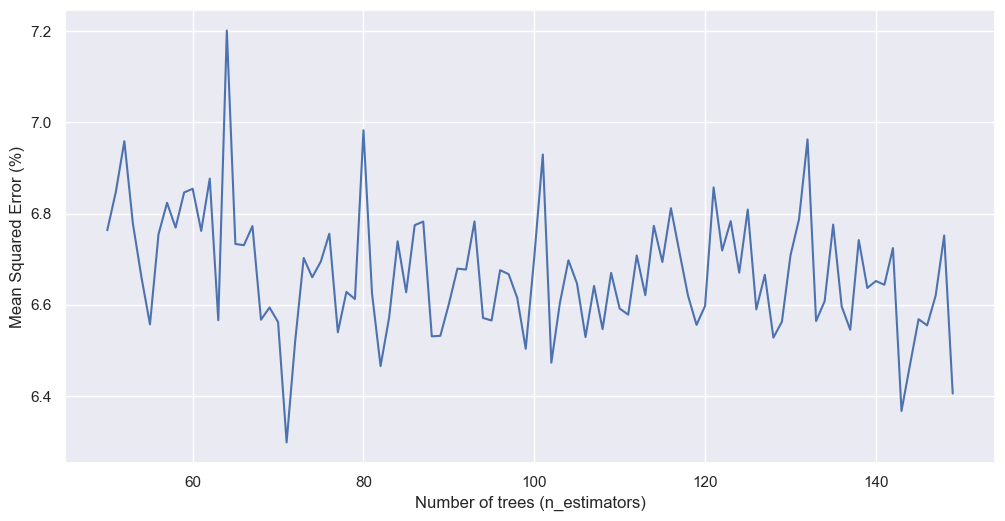

In [22]:
sns.set_theme()
sns.lineplot(N_estimators,MSE_list)
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Mean Squared Error (%)')
plt.savefig('img/mse.eps')

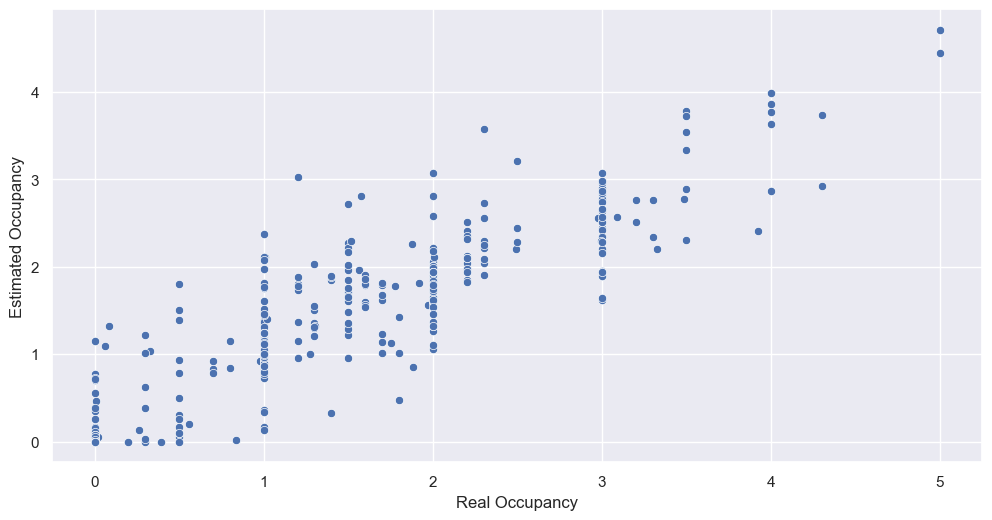

In [21]:

sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel('Real Occupancy')
plt.ylabel('Estimated Occupancy')
plt.savefig('img/estimationn.eps')
